# Entanglement and Bell States

This notebook demonstrates how to create a Bell state, visualize the circuit, simulate it, and export the corresponding OpenQASM code.

## Step 1: Import qiskit and verify the version

In [1]:
import qiskit

qiskit.__version__

'2.0.0'

## Step 2: Create the Bell state circuit

A **Bell state** is a specific type of **entangled state** of two qubits. It exhibits quantum correlations that cannot be explained classically.

There are four Bell states:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} \left(|00\rangle + |11\rangle\right), \qquad 
|\Phi^-\rangle = \frac{1}{\sqrt{2}} \left(|00\rangle - |11\rangle\right) \\[5pt]
|\Psi^+\rangle = \frac{1}{\sqrt{2}} \left(|01\rangle + |10\rangle\right), \qquad
|\Psi^-\rangle = \frac{1}{\sqrt{2}} \left(|01\rangle - |10\rangle\right)
$$

This means:
- The qubits are in a superposition of states.
- Measuring one qubit gives you information about the other.
- They are correlated in a way that cannot be explained by classical physics.

We will create the Bell state $|\Phi^+\rangle$ using the following steps:
- Initializing two qubits in the `|0⟩` state
- Applying a **Hadamard gate** `H` to the first qubit (creating superposition $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$)
- Applying a **CNOT gate** `CX` with the first qubit as control and the second qubit as target

$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}, \qquad
CX = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}
$$

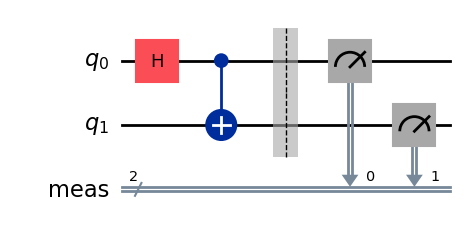

In [2]:
from qiskit import QuantumCircuit

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Apply Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT with control=0, target=1
qc.cx(0, 1)

# Measure both qubits
qc.measure_all()  # This measures qubit 0 and qubit 1 into classical bits

# Draw the circuit
qc.draw('mpl')

If you have LaTeX installed, you can use the following line to render the circuit.

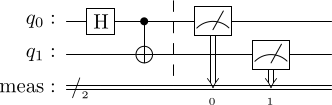

In [3]:
qc.draw('latex')

You cna also use the following line to render the circuit in a LaTeX (text) format.

In [4]:
print(qc.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \ctrl{1} \barrier[0em]{1} & \qw & \meter & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \targ & \qw & \qw & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{meas} :  }} & \lstick{\mathrm{{meas} :  }} & \lstick{/_{_{2}}} \cw & \cw & \cw & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-2,0] & \dstick{_{_{\hspace{0.0em}1}}} \cw \ar @{<=} [-1,0] & \cw & \cw\\
\\ }}
\end{document}


## Step 3: Simulate and view results

We will use the `qasm_simulator` backend to simulate the circuit and visualize the results.

- First, transpile the circuit for the simulator
- Then, run the simulation
- Finally, plot the results using a histogram

The transpiler rewrites the circuit to match the instruction set architecture (ISA) and basis gates of the backend, and can also optimize the circuit.

The simulation will show the frequency of measuring each state, for which we expect to see the states `|00⟩` and `|11⟩` with almost equal frequencies, and the states `|01⟩` and `|10⟩` with zero frequencies. `shots` is the number of times we run the simulation, and `memory` is the list of results from each run. 

The histogram will show the counts of each state measured.

Memory: ['11', '11', '00', '00', '11', '11', '11', '11', '11', '00', '11', '00', '11', '00', '11', '00', '00', '00', '00', '11', '11', '00', '11', '11', '11', '00', '11', '11', '11', '11', '00', '11', '00', '00', '11', '11', '11', '00', '11', '00', '00', '11', '00', '00', '00', '00', '11', '00', '00', '11', '00', '11', '11', '11', '00', '00', '00', '00', '11', '00', '11', '11', '00', '11', '11', '11', '00', '00', '11', '11', '00', '00', '11', '00', '00', '00', '00', '11', '00', '00', '00', '11', '11', '00', '00', '00', '11', '00', '11', '00', '11', '11', '00', '00', '11', '11', '11', '00', '11', '11', '11', '00', '00', '00', '00', '00', '11', '11', '00', '00', '00', '11', '00', '11', '00', '11', '00', '00', '00', '00', '11', '00', '00', '11', '11', '00', '00', '00', '00', '11', '00', '00', '00', '11', '11', '00', '11', '11', '11', '00', '00', '00', '00', '11', '11', '00', '00', '11', '00', '11', '11', '11', '00', '11', '11', '11', '11', '11', '00', '00', '00', '11', '00', '00', '11', '

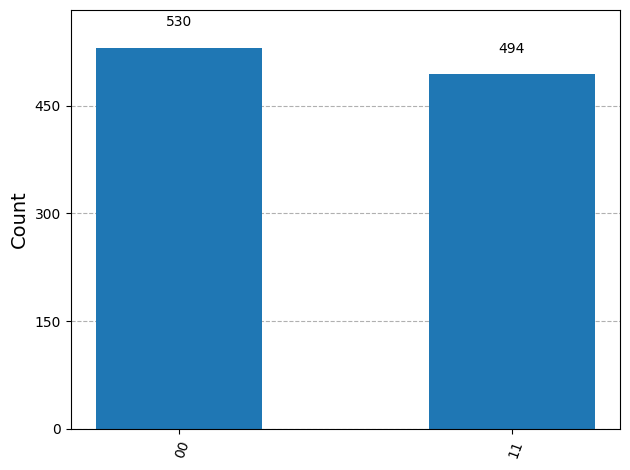

In [5]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer simulator
backend = AerSimulator()

# Transpile and assemble the circuit
compiled = transpile(qc, backend)

# Run the circuit on the simulator
job = backend.run(compiled, shots=1024, memory=True)

# Get the results
result = job.result()
counts = result.get_counts()

# Print the memory
print("Memory:", result.get_memory())

# Plot the results
plot_histogram(counts)

## Step 4: Export OpenQASM code

The OpenQASM code is a low-level representation of the quantum circuit. It can be used to run the circuit on different quantum hardware or simulators that support OpenQASM.

In [6]:
from qiskit import qasm3

qasm_code = qasm3.dumps(qc)
print(qasm_code)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];



We can import the `qasm` string into a `QuantumCircuit` object.

It requires the `qiskit-qasm3-import` package to be installed.

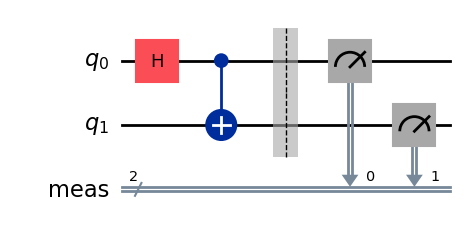

In [7]:
qc = qasm3.loads(qasm_code)
qc.draw('mpl')

## Other Bell states

We can also create other Bell states by applying different gates. 

### The $|\Phi^-\rangle = \frac{1}{\sqrt{2}} \left(|00\rangle - |11\rangle\right)$ state

$|\Phi^-\rangle$ can be created by applying a `Z` gate to the second qubit after creating $|\Phi^+\rangle$, where:

$$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

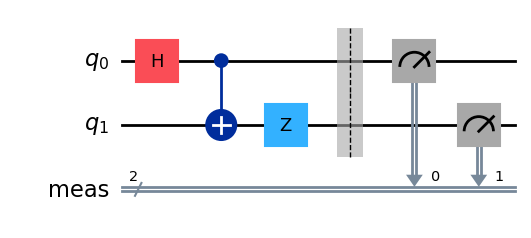

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.z(1) # Apply Z gate to qubit 1 to flip the phase
qc.measure_all()
qc.draw('mpl')

We can execute the circuit on the simulator and visualize the results.
The results should show the states `|00⟩` and `|11⟩` with almost equal frequencies, and the states `|01⟩` and `|10⟩` with zero frequencies.
Therefore, the probability of measuring `|00⟩` and `|11⟩` does not change, but the phase of the `|11⟩` state is flipped (negative), which can be useful in certain algorithms if performed before a measurement.

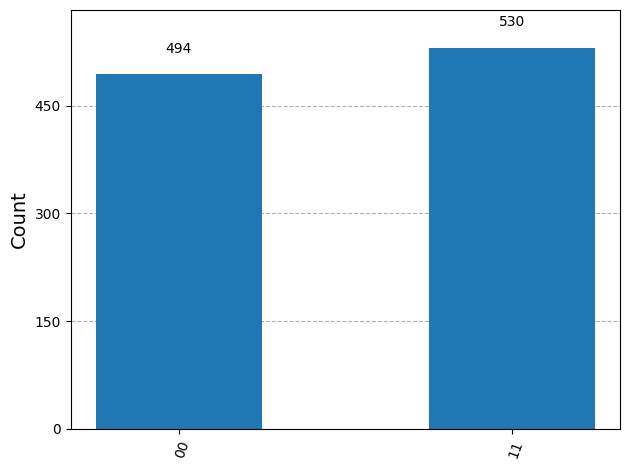

In [9]:
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### The $|\Psi^+\rangle = \frac{1}{\sqrt{2}} \left(|01\rangle + |10\rangle\right)$ state

To create the state $|\Psi^+\rangle$, we can apply a `X` gate to the second qubit after creating $|\Phi^+\rangle$, where:

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

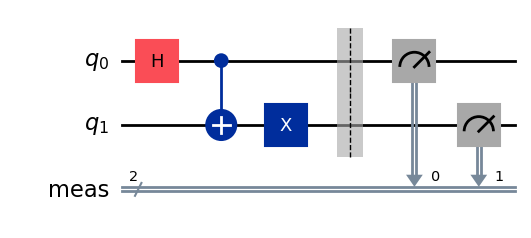

In [10]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.x(1) # Apply X gate to qubit 1 (the second) to flip the state
qc.measure_all()
qc.draw('mpl')

The results should show the states `|01⟩` and `|10⟩` with almost equal frequencies, and the states `|00⟩` and `|11⟩` with zero frequencies.

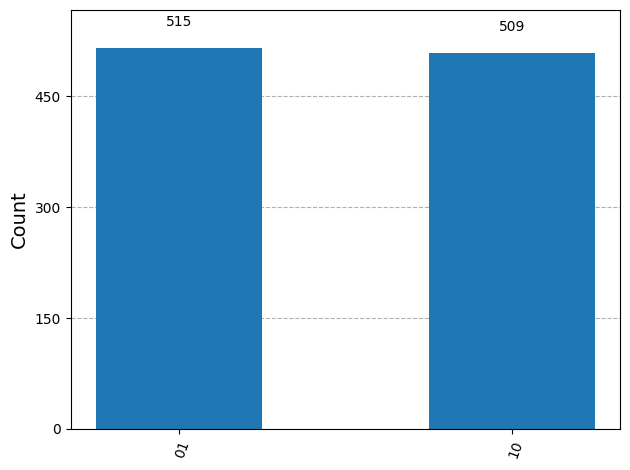

In [11]:
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### The $|\Psi^-\rangle = \frac{1}{\sqrt{2}} \left(|01\rangle - |10\rangle\right)$ state

To create the state $|\Psi^-\rangle$,

- Start with both qubits in the `|0⟩` state
- Apply a `H` gate to the first qubit
- Apply a `CX` gate with the first qubit as control and the second qubit as target
- Apply an `X` gate to the first qubit to prepare `|01⟩`
- Apply a `Z` gate to the first qubit

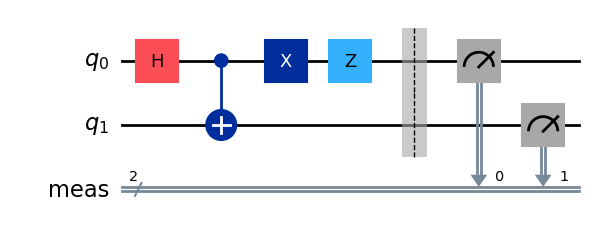

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.x(0)
qc.z(0)
qc.measure_all()
qc.draw('mpl')

The results should show the states `|01⟩` and `|10⟩` with almost equal frequencies, and the states `|00⟩` and `|11⟩` with zero frequencies.

Therefore, the probability of measuring `|01⟩` and `|10⟩` does not change, but the phase of the `|10⟩` state is flipped (negative), which can be useful in certain algorithms if performed before a measurement.

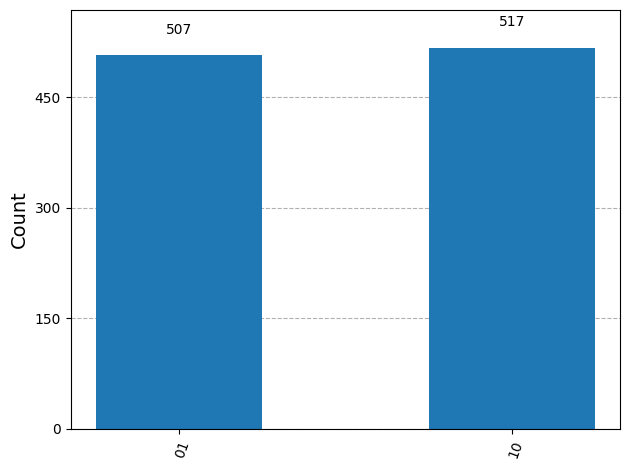

In [13]:
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)